# Machine Learning 
## explore numpy, matplotlilb, scikit learn
 numpy ->scientific computing
 matplotlib -> for plotting
 scikit learn -> machine learning algorithm


In [1]:
# importing the libraries: numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0) # for reproducibility
# every time the random number will be samwe

In [3]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10) #gaussian distribution
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

#  loc= mean=5(number will between 4 & 6)
# scale= standard deviation 

In [4]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [5]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [6]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

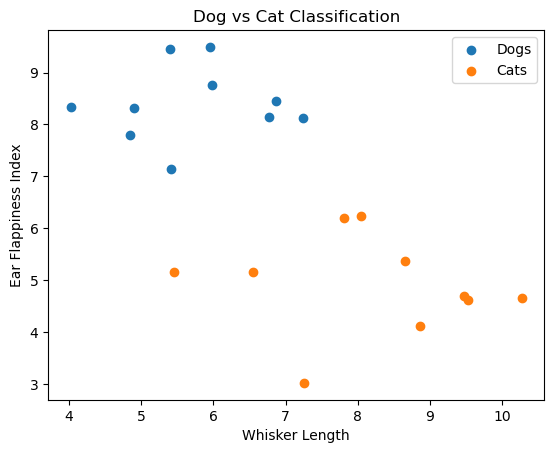

In [7]:
# Plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [9]:
# Implementing random linear classifier algorithm

def random_linear_classifier(data_dogs, data_cats, k, d):
#     d is the number of features
    best_error=float('inf')
    best_theta=None
    best_theta0=None
    
    for _ in range(k):
        theta=np.random.normal(size=d)
        theta0=np.random.normal()
        error=compute_error(data_dogs, data_cats, theta, theta0)
        
        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta, best_theta0
     
        

In [8]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog)+theta0<=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta, x_cat)+theta0>=0:
            error+=1
    return error

In [10]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [11]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [12]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [17]:
# Run random linear classifier algorithm
k = 200  # Number of iterations
d = 2  # Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [18]:
best_theta

array([-1.07075262,  1.05445173])

In [19]:
best_theta0

-0.40317694697317963

In [20]:
# Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

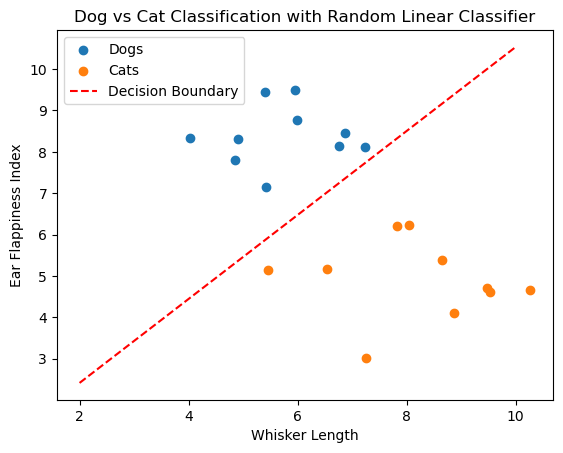

In [21]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()